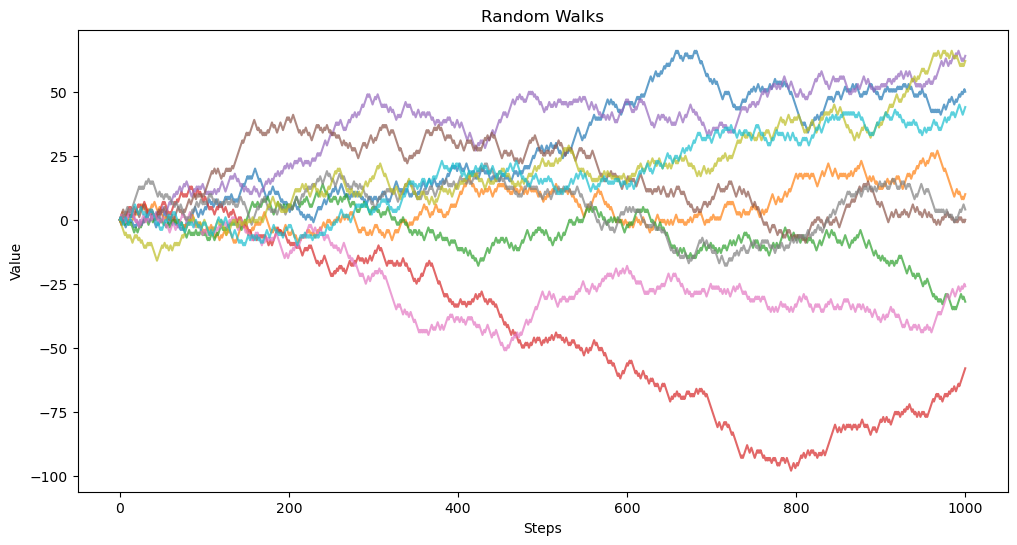

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk(n_steps):
    steps = np.random.choice([-1,1], size = n_steps)
    path = np.cumsum(steps)
    return np.concatenate(([0], path))  

n_steps = 1000
n_paths = 10

plt.figure(figsize=(12,6))
for n in range(n_paths):
    path = random_walk(n_steps)
    plt.plot(path, alpha = 0.7)

plt.title("Random Walks")
plt.xlabel("Steps")
plt.ylabel("Value")
plt.show()

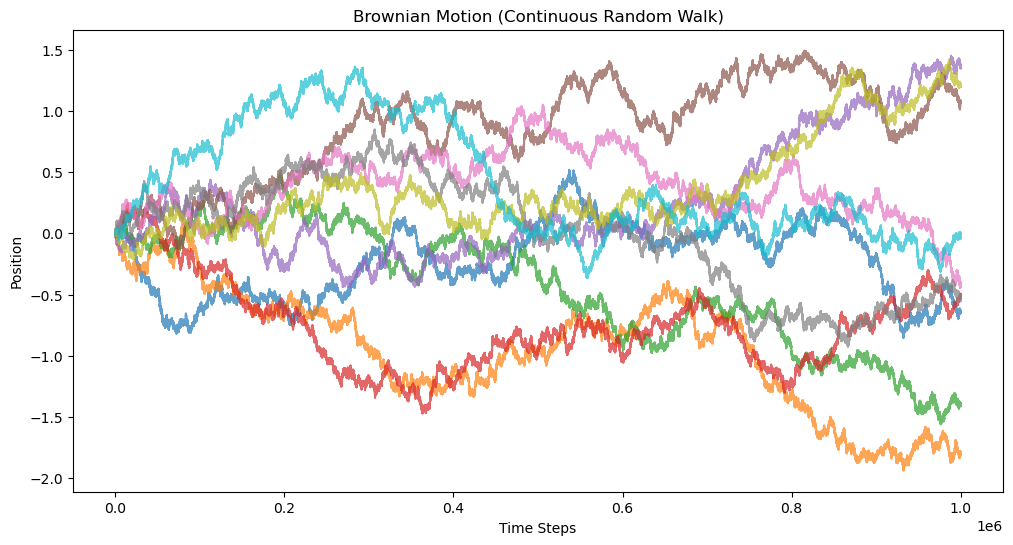

In [16]:
#Continuous Random Walk (Brownian Motion)

def brownian_motion(n_steps, dt=0.000001):
    """Generate a Brownian motion path using Gaussian increments"""
    dW = np.random.normal(0, np.sqrt(dt), size=n_steps)
    path = np.cumsum(dW)
    return np.concatenate(([0], path))

n_steps = 1000000
n_paths = 10
dt = 0.000001

plt.figure(figsize=(12,6))
for n in range(n_paths):
    path = brownian_motion(n_steps, dt)
    plt.plot(path, alpha=0.7)

plt.title("Brownian Motion (Continuous Random Walk)")
plt.xlabel("Time Steps")
plt.ylabel("Position")
plt.show()

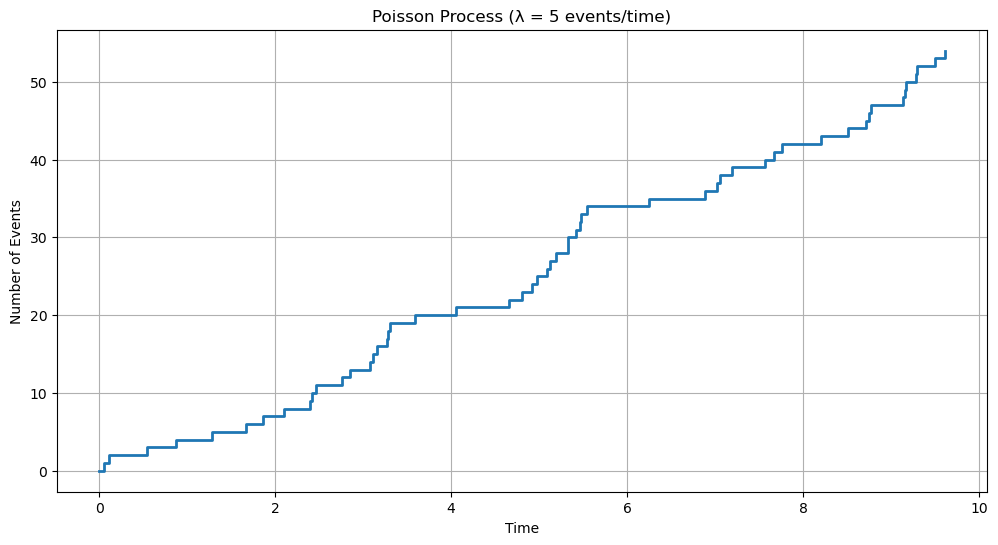

Total events in [0, 10]: 54
Expected: 50


In [17]:
# Exercise 3: Poisson Process (Jump Process)
# Poisson: random number of events in fixed time interval

def poisson_process(rate=1.0, T=10):
    """
    Simulate Poisson process
    rate: average number of events per unit time (λ)
    T: total time
    """
    # Generate inter-arrival times (exponentially distributed)
    times = [0]
    while times[-1] < T:
        inter_arrival = np.random.exponential(1/rate)
        times.append(times[-1] + inter_arrival)
    
    # Remove last time if it exceeds T
    times = [t for t in times if t <= T]
    
    # Count: number of events up to each time
    counts = list(range(len(times)))
    
    return times, counts

# Simulate
rate = 5  # 5 events per unit time on average
T = 10
times, counts = poisson_process(rate, T)

# Plot as step function
plt.figure(figsize=(12, 6))
plt.step(times, counts, where='post', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Number of Events')
plt.title(f'Poisson Process (λ = {rate} events/time)')
plt.grid(True)
plt.show()

print(f"Total events in [0, {T}]: {counts[-1]}")
print(f"Expected: {rate * T}")